In [1]:
#Import functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #graphic
import seaborn as sns

plt.style.use('seaborn')

# Exploratory Data Analysis (EDA)

In [2]:
#Attribute information
with open("forestfires.names", encoding = "ISO-8859-1") as f:
    print(f.read())

Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 


In [3]:
#Import CSV
df_ff = pd.read_csv('forestfires.csv')
df_ff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
#Check for nulls
#sum() is done twice to get total rows with null values from all columns/features
df_ff.isna().sum().sum()

0

In [5]:
#Table summary
df_ff.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


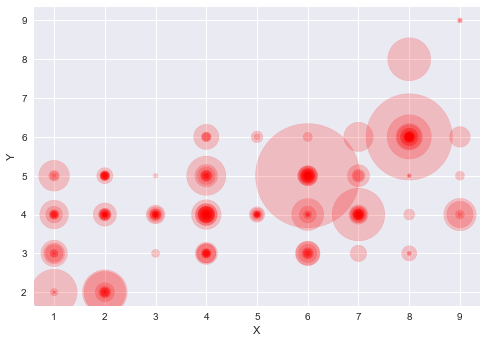

In [6]:
df_ff.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=10*df_ff['area'], color='red')

In [7]:
#Skew and kurtosis
print("Skew: \n{}".format(df_ff.skew()))
print("Kurtosis: \n{}".format(df_ff.kurtosis()))

Skew: 
X        0.036246
Y        0.417296
FFMC    -6.575606
DMC      0.547498
DC      -1.100445
ISI      2.536325
temp    -0.331172
RH       0.862904
wind     0.571001
rain    19.816344
area    12.846934
dtype: float64
Kurtosis: 
X        -1.172331
Y         1.420553
FFMC     67.066041
DMC       0.204822
DC       -0.245244
ISI      21.458037
temp      0.136166
RH        0.438183
wind      0.054324
rain    421.295964
area    194.140721
dtype: float64


- If skewness is less than −1 or greater than +1, the distribution is highly skewed.
- If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
- If skewness is between −½ and +½, the distribution is approximately symmetric.

- A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.
- A distribution with kurtosis <3 (excess kurtosis <0 ) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.
- A distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.

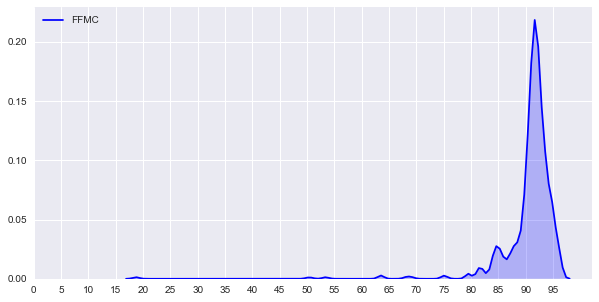

In [8]:
#plot FFMC
plt.figure(figsize=(10,5))
ax = sns.kdeplot(df_ff['FFMC'],shade=True,color='b')
plt.xticks([i for i in range(0,100,5)])
plt.show()
#FFMC is left skewed

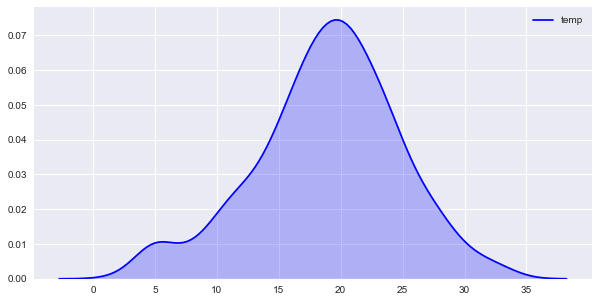

In [9]:
#plot temp
plt.figure(figsize=(10,5))
ax = sns.kdeplot(df_ff['temp'],shade=True,color='b')
plt.xticks([i for i in range(0,40,5)])
plt.show()
#FFMC is approximately symmetric

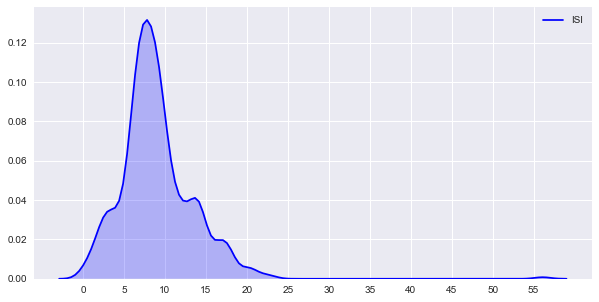

In [10]:
#plot ISI
plt.figure(figsize=(10,5))
ax = sns.kdeplot(df_ff['ISI'],shade=True,color='b')
plt.xticks([i for i in range(0,60,5)])
plt.show()
#ISI is right skewed

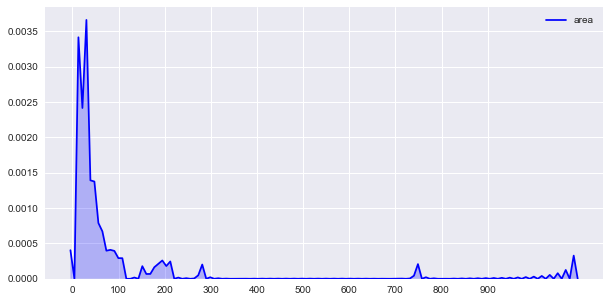

In [11]:
#plot area
plt.figure(figsize=(10,5))
ax = sns.kdeplot(df_ff['area'],shade=True,color='b')
plt.xticks([i for i in range(0,1000,100)])
plt.show()
#ISI is right skewed with high kurtosis

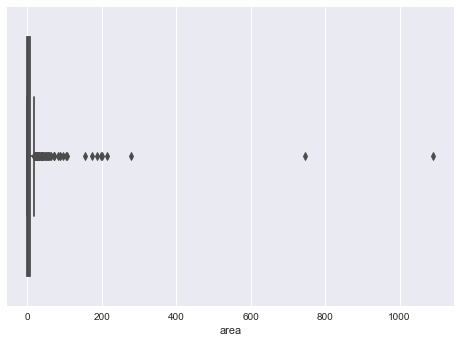

In [12]:
#Boxplot to investigate probability of outliers
ax = sns.boxplot(df_ff['area'])

In [13]:
#Get outliers
outliers = df_ff[df_ff['area'] >= 200] #200 is an arbitrary number based on the boxplot above
outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


In [14]:
#Get Dtype
df_ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [15]:
df_wo_area = df_ff.drop(columns='area')
categorical = df_wo_area.select_dtypes(include='object').columns.tolist()
numerical = df_wo_area.select_dtypes(exclude='object').columns.tolist()

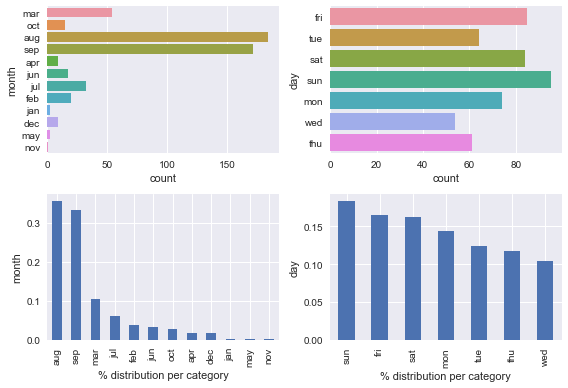

In [16]:
for i,col in enumerate(categorical,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df_wo_area,y=col)
    plt.subplot(2,2,i+2)
    df_ff[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80b21e6e20>,
      dtype=object)

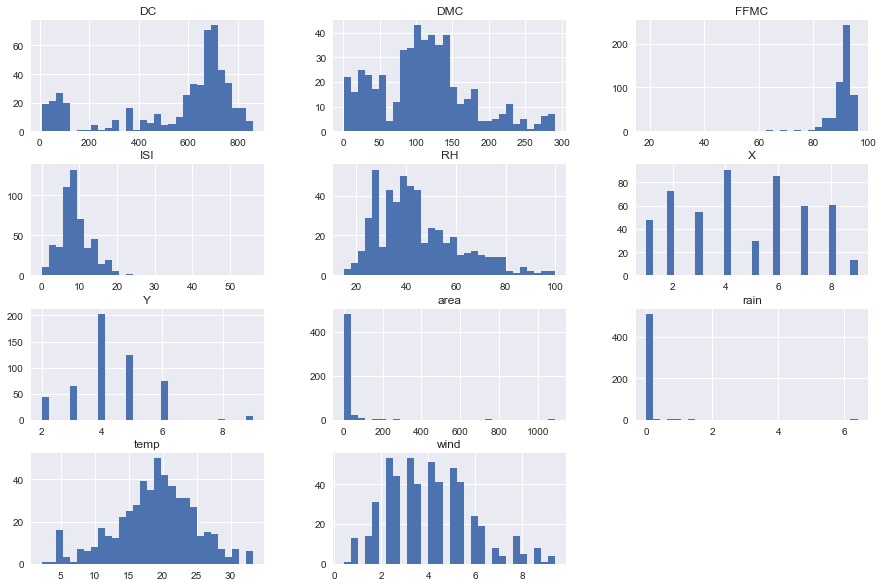

In [17]:
# Plot overall histogram
df_ff.hist(bins=30, figsize=(15,10))

Features with skews and kurtosis: FFMC, ISI, rain

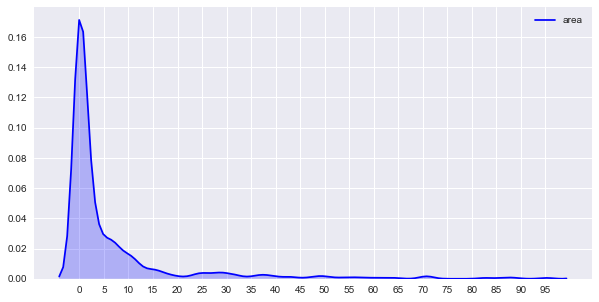

In [18]:
#plot area
target_plot = df_ff[df_ff['area'] <= 100]
plt.figure(figsize=(10,5))
ax = sns.kdeplot(target_plot['area'],shade=True,color='b')
plt.xticks([i for i in range(0,100,5)])
plt.show()
#ISI is right skewed with high kurtosis

In [19]:
# Categorizing severity of forest fire based on area
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df_ff['damage_category'] = df_ff['area'].apply(area_cat)
df_ff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,No damage


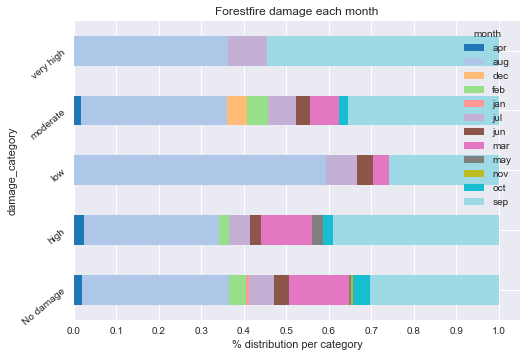

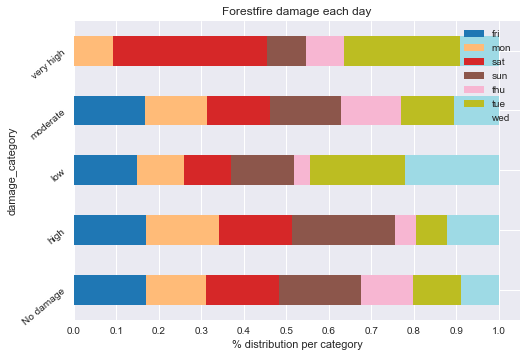

In [20]:
for col in categorical:
    cross = pd.crosstab(index=df_ff['damage_category'],columns=df_ff[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='tab20')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))

plt.legend(loc='upper right')
plt.show()

In [21]:
target = df_ff['area']

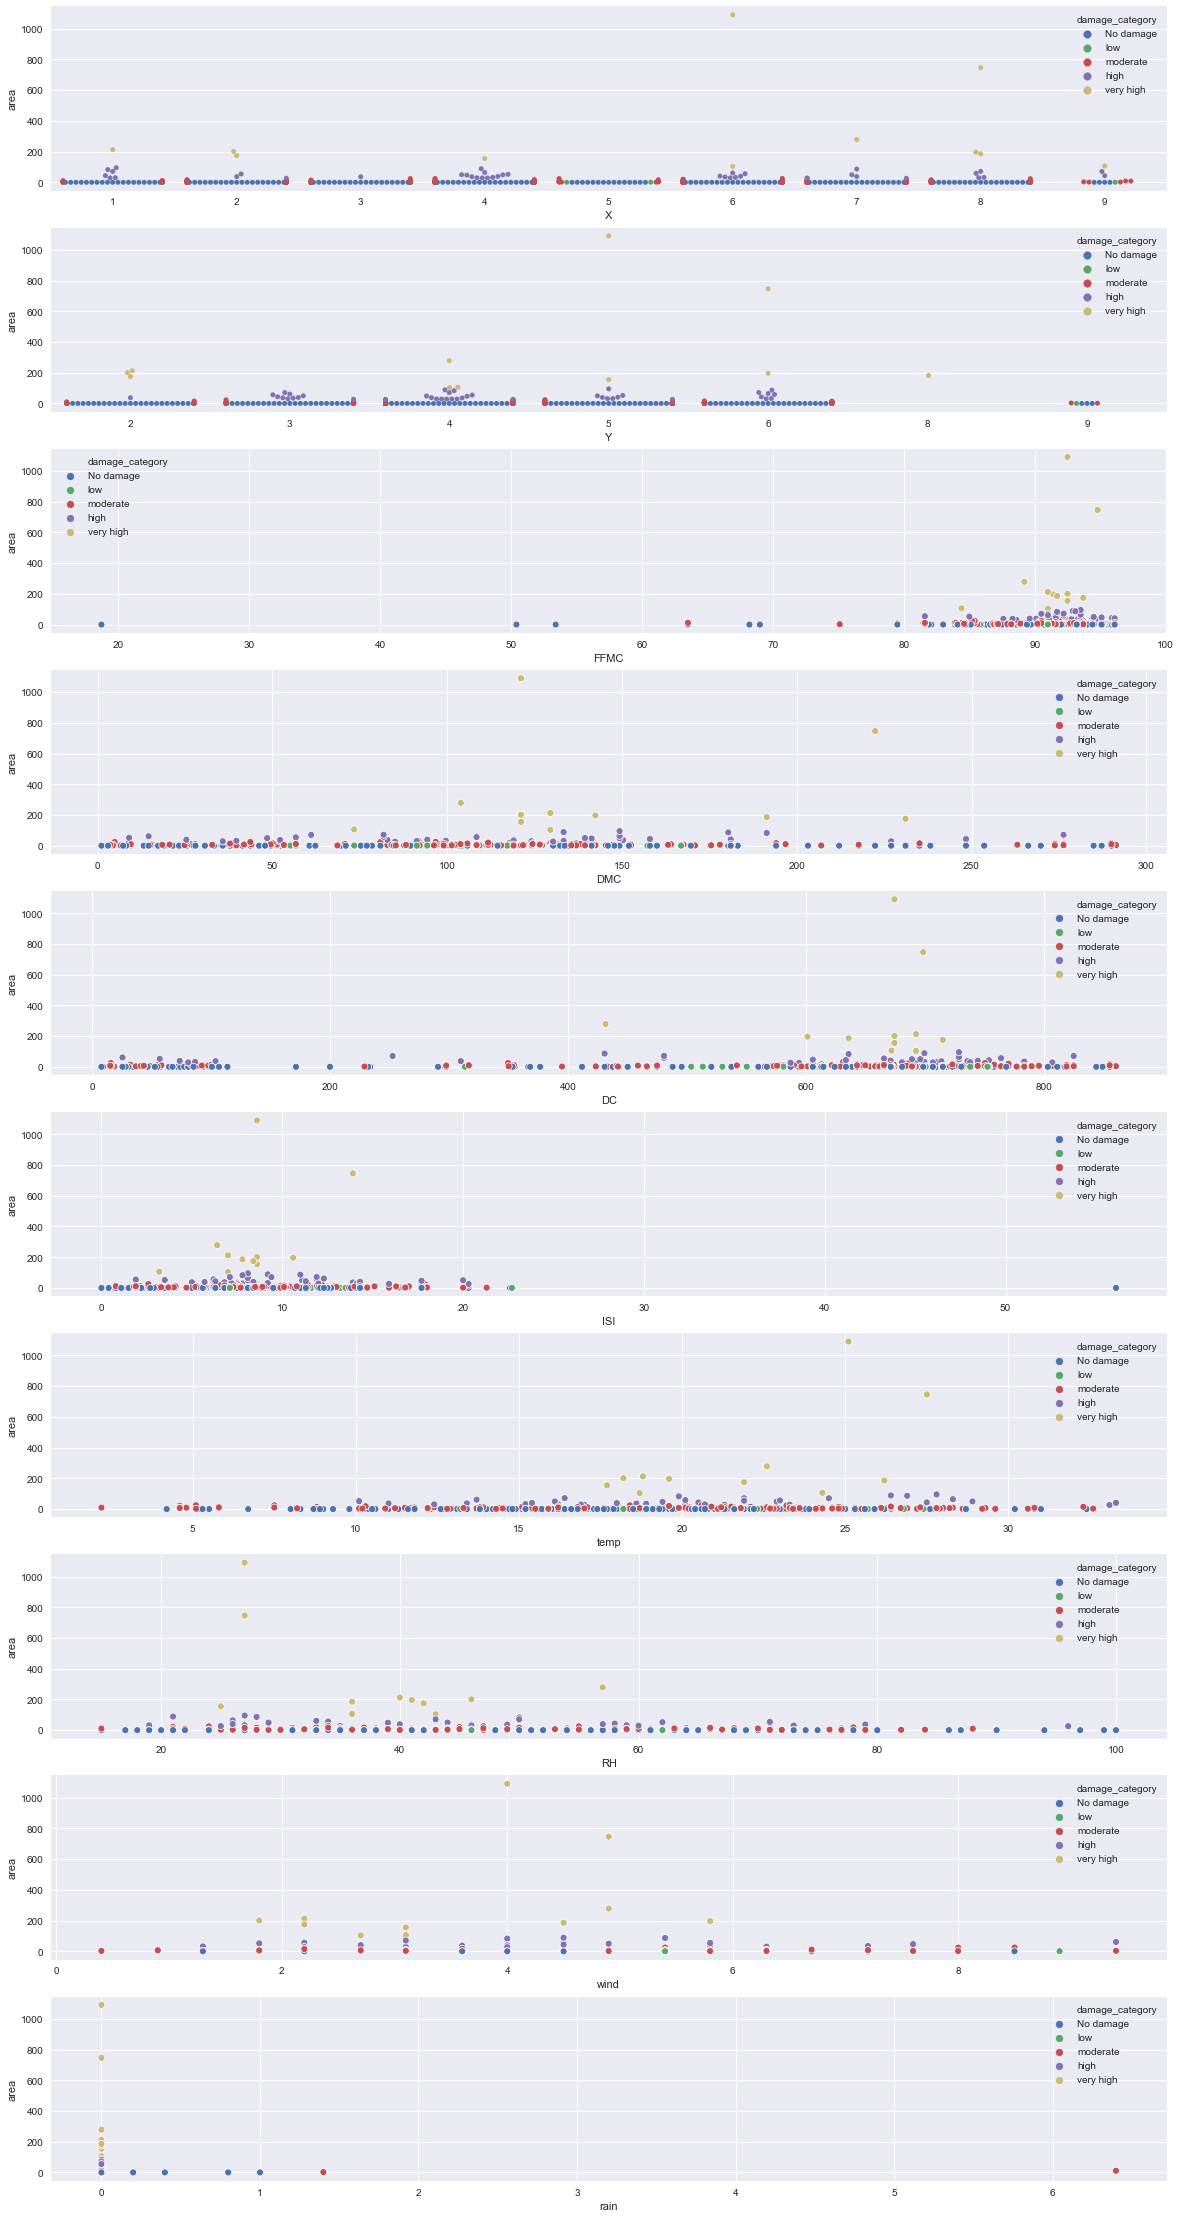

In [22]:
plt.figure(figsize=(20,40))
for i,col in enumerate(numerical,1):
    plt.subplot(10,1,i)
    if col in ['X','Y']:
        sns.swarmplot(data=df_ff,x=col,y=target,hue='damage_category')
    else:
        sns.scatterplot(data=df_ff,x=col,y=target,hue='damage_category')
plt.show()

In [23]:
df_ff['target'] = df_ff['damage_category'].replace(['No damage','low','moderate','high','very high'],[0,1,2,3,4])
df_ff = df_ff.drop(['damage_category','area'],axis=1)

## Model Building

In [24]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [25]:
X = df_ff.drop(['target'],axis=1)
y = df_ff['target']
print('Input', X.shape)
print('Output', y.shape)

# X = df_ff.iloc[:, 0:12].values # independent
# y = df_ff.iloc[:, 12].values # dependent variable

Input (517, 12)
Output (517,)


In [26]:
# Encoding categorical data for independent variables 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
# X[':, 2'] = labelencoder_X_1.fit_transform(X[:, 2]) #For month
X['month'] = labelencoder_X_1.fit_transform(X['month']) #For month
labelencoder_X_2 = LabelEncoder()
# X[:, 3] = labelencoder_X_2.fit_transform(X[:, 3]) #For weekday
X['day'] = labelencoder_X_2.fit_transform(X['day']) #For weekday

In [27]:
X.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [28]:
encoded = pd.get_dummies(X['month'], prefix='Month')
X_new = X.join(encoded)
X_new.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,...,0,0,0,0,0,1,0,0,0,0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,...,0,0,0,0,0,0,0,0,1,0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,...,0,0,0,0,0,0,0,0,1,0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,...,0,0,0,0,0,1,0,0,0,0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,...,0,0,0,0,0,1,0,0,0,0


In [29]:
encoded_1 = pd.get_dummies(X_new['day'], prefix='day')
X_new_1 = X_new.join(encoded_1)
X_new_1.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,Month_9,Month_10,Month_11,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,...,0,0,0,1,0,0,0,0,0,0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,...,0,1,0,0,0,0,0,0,1,0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,...,0,1,0,0,0,1,0,0,0,0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,...,0,0,0,1,0,0,0,0,0,0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,...,0,0,0,0,0,0,1,0,0,0


In [30]:
X = X_new_1.copy()
X = X.drop(['month','day'],axis=1)
X.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,Month_9,Month_10,Month_11,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# from sklearn.compose import ColumnTransformer
# ct = ColumnTransformer([("month", OneHotEncoder(), [2])], remainder = 'passthrough')
# X = ct.fit_transform(X)

# ct_2 = ColumnTransformer([("day", OneHotEncoder(), [3])], remainder = 'passthrough')
# X = ct_2.fit_transform(X)

In [ ]:
# onehotencoder = OneHotEncoder()#dummy variable for month
# X = onehotencoder.fit_transform(X).toarray()
# X = X[:, 1:] #avoid dummy variable trap 
# onehotencoder = OneHotEncoder()#dummy variable for week
# X = onehotencoder.fit_transform(X).toarray()
# X = X[:, 1:] #avoid dummy variable trap

In [31]:
y = to_categorical(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# y_train = np.asarray(target).astype('float32').reshape((-1,1))
# y_test = np.asarray(target).astype('float32').reshape((-1,1))

In [34]:
model = Sequential(name='forest_fire_mod')
model.add(Dense(50, input_dim=29, activation='relu', kernel_initializer='uniform')) #input layer and 1st hidden layer
model.add(Dense(17, activation='relu', kernel_initializer='uniform')) #2nd hidden layer
model.add(Dense(17, activation='relu', kernel_initializer='uniform')) #3rd hidden layer
model.add(Dense(5, activation='softmax', kernel_initializer='uniform')) #output layer

model.summary()

Model: "forest_fire_mod"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1500      
_________________________________________________________________
dense_1 (Dense)              (None, 17)                867       
_________________________________________________________________
dense_2 (Dense)              (None, 17)                306       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 90        
Total params: 2,763
Trainable params: 2,763
Non-trainable params: 0
_________________________________________________________________


In [35]:
optimizer = SGD(lr=0.01,momentum=0.7)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/pt.gojekindonesia/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [36]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=5, verbose=1)

Epoch 1/100
73/73 [==============================] - 1s 5ms/step - loss: 0.6438 - accuracy: 0.4626 - val_loss: 0.4719 - val_accuracy: 0.4936
Epoch 2/100
73/73 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.4709 - val_loss: 0.3766 - val_accuracy: 0.4936
Epoch 3/100
73/73 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.4709 - val_loss: 0.3769 - val_accuracy: 0.4936
Epoch 4/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.4709 - val_loss: 0.3765 - val_accuracy: 0.4936
Epoch 5/100
73/73 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 0.4709 - val_loss: 0.3744 - val_accuracy: 0.4936
Epoch 6/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.4709 - val_loss: 0.3745 - val_accuracy: 0.4936
Epoch 7/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.4709 - val_loss: 0.3757 - val_accuracy: 0.4936
Epoch 8/100
7

Epoch 59/100
73/73 [==============================] - 0s 2ms/step - loss: 0.2724 - accuracy: 0.6676 - val_loss: 0.5170 - val_accuracy: 0.5000
Epoch 60/100
73/73 [==============================] - 0s 1ms/step - loss: 0.2706 - accuracy: 0.6620 - val_loss: 0.5118 - val_accuracy: 0.4872
Epoch 61/100
73/73 [==============================] - 0s 2ms/step - loss: 0.2678 - accuracy: 0.6676 - val_loss: 0.5251 - val_accuracy: 0.5128
Epoch 62/100
73/73 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.6842 - val_loss: 0.5500 - val_accuracy: 0.5128
Epoch 63/100
73/73 [==============================] - 0s 2ms/step - loss: 0.2636 - accuracy: 0.6759 - val_loss: 0.5204 - val_accuracy: 0.5513
Epoch 64/100
73/73 [==============================] - 0s 2ms/step - loss: 0.2581 - accuracy: 0.6870 - val_loss: 0.5599 - val_accuracy: 0.4936
Epoch 65/100
73/73 [==============================] - 0s 1ms/step - loss: 0.2583 - accuracy: 0.6648 - val_loss: 0.5576 - val_accuracy: 0.5064
Epoch 

In [37]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.803, Valid: 0.500


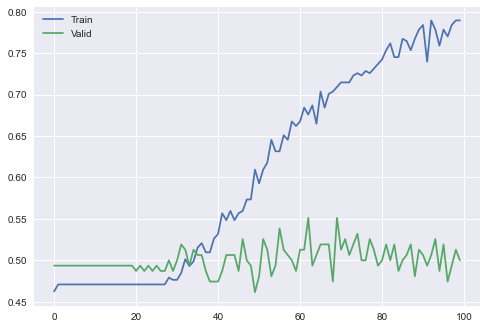

In [38]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

In [39]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=1, verbose=1)

Epoch 1/500
361/361 [==============================] - 1s 2ms/step - loss: 0.3078 - accuracy: 0.6620 - val_loss: 0.7354 - val_accuracy: 0.4808
Epoch 2/500
361/361 [==============================] - 1s 2ms/step - loss: 0.2353 - accuracy: 0.7341 - val_loss: 0.8097 - val_accuracy: 0.5192
Epoch 3/500
361/361 [==============================] - 1s 2ms/step - loss: 0.2126 - accuracy: 0.7452 - val_loss: 0.9292 - val_accuracy: 0.5000
Epoch 4/500
361/361 [==============================] - 1s 3ms/step - loss: 0.1972 - accuracy: 0.7729 - val_loss: 0.8682 - val_accuracy: 0.5192
Epoch 5/500
361/361 [==============================] - 1s 2ms/step - loss: 0.1893 - accuracy: 0.7729 - val_loss: 0.9065 - val_accuracy: 0.5192
Epoch 6/500
361/361 [==============================] - 1s 2ms/step - loss: 0.2013 - accuracy: 0.7645 - val_loss: 0.9188 - val_accuracy: 0.4679
Epoch 7/500
361/361 [==============================] - 1s 2ms/step - loss: 0.1963 - accuracy: 0.7784 - val_loss: 0.9728 - val_accuracy: 0.5000

Epoch 58/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0791 - accuracy: 0.9197 - val_loss: 2.0983 - val_accuracy: 0.4551
Epoch 59/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0732 - accuracy: 0.9280 - val_loss: 2.0439 - val_accuracy: 0.4231
Epoch 60/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0742 - accuracy: 0.9335 - val_loss: 1.9285 - val_accuracy: 0.4359
Epoch 61/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0657 - accuracy: 0.9446 - val_loss: 2.1342 - val_accuracy: 0.4679
Epoch 62/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9280 - val_loss: 2.0405 - val_accuracy: 0.4359
Epoch 63/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0965 - accuracy: 0.9086 - val_loss: 2.0068 - val_accuracy: 0.4038
Epoch 64/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0949 - accuracy: 0.9169 - val_loss: 2.0670 - val_accuracy:

Epoch 115/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0610 - accuracy: 0.9668 - val_loss: 2.9576 - val_accuracy: 0.4359
Epoch 116/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0352 - accuracy: 0.9806 - val_loss: 2.8762 - val_accuracy: 0.4167
Epoch 117/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0298 - accuracy: 0.9751 - val_loss: 3.0637 - val_accuracy: 0.4359
Epoch 118/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0318 - accuracy: 0.9723 - val_loss: 2.8496 - val_accuracy: 0.3910
Epoch 119/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0308 - accuracy: 0.9668 - val_loss: 3.1066 - val_accuracy: 0.4423
Epoch 120/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0293 - accuracy: 0.9751 - val_loss: 3.1540 - val_accuracy: 0.4487
Epoch 121/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0289 - accuracy: 0.9723 - val_loss: 3.0937 - val_ac

361/361 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9501 - val_loss: 3.3935 - val_accuracy: 0.4359
Epoch 172/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0735 - accuracy: 0.9446 - val_loss: 3.3968 - val_accuracy: 0.4231
Epoch 173/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0267 - accuracy: 0.9751 - val_loss: 3.5200 - val_accuracy: 0.4359
Epoch 174/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0144 - accuracy: 0.9889 - val_loss: 3.4676 - val_accuracy: 0.4359
Epoch 175/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0114 - accuracy: 0.9889 - val_loss: 3.5760 - val_accuracy: 0.4295
Epoch 176/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0125 - accuracy: 0.9806 - val_loss: 3.5770 - val_accuracy: 0.4167
Epoch 177/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0110 - accuracy: 0.9889 - val_loss: 3.5930 - val_accuracy: 0.4103

361/361 [==============================] - 1s 1ms/step - loss: 0.0092 - accuracy: 0.9834 - val_loss: 4.1126 - val_accuracy: 0.4295
Epoch 228/500
361/361 [==============================] - 0s 1ms/step - loss: 0.0101 - accuracy: 0.9889 - val_loss: 4.0609 - val_accuracy: 0.4295
Epoch 229/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0107 - accuracy: 0.9861 - val_loss: 4.1218 - val_accuracy: 0.4295
Epoch 230/500
361/361 [==============================] - 0s 1ms/step - loss: 0.0113 - accuracy: 0.9861 - val_loss: 4.1305 - val_accuracy: 0.4487
Epoch 231/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0113 - accuracy: 0.9834 - val_loss: 4.1280 - val_accuracy: 0.4551
Epoch 232/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0096 - accuracy: 0.9834 - val_loss: 4.2971 - val_accuracy: 0.4487
Epoch 233/500
361/361 [==============================] - 0s 1ms/step - loss: 0.0602 - accuracy: 0.9557 - val_loss: 4.1871 - val_accuracy: 0.4103

361/361 [==============================] - 1s 1ms/step - loss: 0.0078 - accuracy: 0.9889 - val_loss: 4.4058 - val_accuracy: 0.4744
Epoch 284/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0078 - accuracy: 0.9861 - val_loss: 4.4309 - val_accuracy: 0.4551
Epoch 285/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0077 - accuracy: 0.9889 - val_loss: 4.4853 - val_accuracy: 0.4679
Epoch 286/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0085 - accuracy: 0.9834 - val_loss: 4.5015 - val_accuracy: 0.4679
Epoch 287/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0101 - accuracy: 0.9806 - val_loss: 4.4444 - val_accuracy: 0.4808
Epoch 288/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0085 - accuracy: 0.9834 - val_loss: 4.4664 - val_accuracy: 0.4423
Epoch 289/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0486 - accuracy: 0.9640 - val_loss: 4.4935 - val_accuracy: 0.4487

361/361 [==============================] - 1s 1ms/step - loss: 0.0303 - accuracy: 0.9751 - val_loss: 4.6747 - val_accuracy: 0.4679
Epoch 340/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0287 - accuracy: 0.9806 - val_loss: 5.0305 - val_accuracy: 0.4615
Epoch 341/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0108 - accuracy: 0.9806 - val_loss: 4.4817 - val_accuracy: 0.4808
Epoch 342/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0073 - accuracy: 0.9889 - val_loss: 4.7041 - val_accuracy: 0.4615
Epoch 343/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0072 - accuracy: 0.9861 - val_loss: 4.7611 - val_accuracy: 0.4551
Epoch 344/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0066 - accuracy: 0.9889 - val_loss: 4.7698 - val_accuracy: 0.4615
Epoch 345/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0081 - accuracy: 0.9861 - val_loss: 4.8203 - val_accuracy: 0.4487

361/361 [==============================] - 1s 2ms/step - loss: 0.0105 - accuracy: 0.9889 - val_loss: 5.1474 - val_accuracy: 0.4551
Epoch 396/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0064 - accuracy: 0.9889 - val_loss: 5.1175 - val_accuracy: 0.4679
Epoch 397/500
361/361 [==============================] - 1s 3ms/step - loss: 0.0099 - accuracy: 0.9834 - val_loss: 5.1460 - val_accuracy: 0.4872
Epoch 398/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0073 - accuracy: 0.9861 - val_loss: 5.2487 - val_accuracy: 0.4744
Epoch 399/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0073 - accuracy: 0.9861 - val_loss: 5.2506 - val_accuracy: 0.4744
Epoch 400/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0423 - accuracy: 0.9778 - val_loss: 5.0919 - val_accuracy: 0.4423
Epoch 401/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0570 - accuracy: 0.9612 - val_loss: 5.1970 - val_accuracy: 0.4551

361/361 [==============================] - 1s 1ms/step - loss: 0.0172 - accuracy: 0.9834 - val_loss: 5.6950 - val_accuracy: 0.4487
Epoch 452/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0978 - accuracy: 0.9584 - val_loss: 5.5896 - val_accuracy: 0.4679
Epoch 453/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0509 - accuracy: 0.9474 - val_loss: 5.5209 - val_accuracy: 0.4679
Epoch 454/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0255 - accuracy: 0.9695 - val_loss: 5.3428 - val_accuracy: 0.4551
Epoch 455/500
361/361 [==============================] - 1s 1ms/step - loss: 0.0074 - accuracy: 0.9917 - val_loss: 5.3880 - val_accuracy: 0.4744
Epoch 456/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9889 - val_loss: 5.4296 - val_accuracy: 0.4679
Epoch 457/500
361/361 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 0.9889 - val_loss: 5.4368 - val_accuracy: 0.4679

In [40]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.992, Valid: 0.462


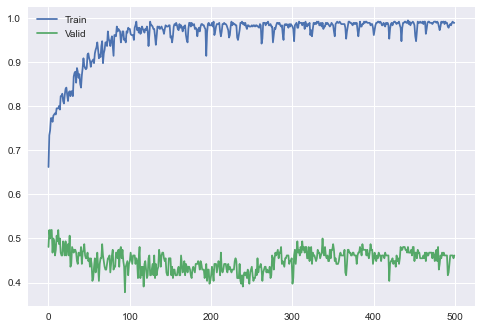

In [41]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

In [42]:
classifier = Sequential()

classifier.add(Dense(17, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
classifier.add(Dense(17, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(17, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(5, kernel_initializer = 'uniform', activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [43]:
classifier.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 5, epochs = 100)

Epoch 1/100
73/73 [==============================] - 1s 4ms/step - loss: 0.6644 - accuracy: 0.4543 - val_loss: 0.5652 - val_accuracy: 0.4936
Epoch 2/100
73/73 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.4709 - val_loss: 0.3780 - val_accuracy: 0.4936
Epoch 3/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.4709 - val_loss: 0.3754 - val_accuracy: 0.4936
Epoch 4/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.4709 - val_loss: 0.3727 - val_accuracy: 0.4936
Epoch 5/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.4709 - val_loss: 0.3751 - val_accuracy: 0.4936
Epoch 6/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.4709 - val_loss: 0.3734 - val_accuracy: 0.4936
Epoch 7/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.4709 - val_loss: 0.3751 - val_accuracy: 0.4936
Epoch 8/100
7

Epoch 59/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.5097 - val_loss: 0.4040 - val_accuracy: 0.5000
Epoch 60/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.5125 - val_loss: 0.4020 - val_accuracy: 0.4936
Epoch 61/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.5180 - val_loss: 0.4066 - val_accuracy: 0.5256
Epoch 62/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.5291 - val_loss: 0.4081 - val_accuracy: 0.5192
Epoch 63/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.5097 - val_loss: 0.4083 - val_accuracy: 0.4936
Epoch 64/100
73/73 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.5485 - val_loss: 0.4087 - val_accuracy: 0.5128
Epoch 65/100
73/73 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.5291 - val_loss: 0.4088 - val_accuracy: 0.5321
Epoch 

In [44]:
_, train_acc = classifier.evaluate(X_train, y_train, verbose=0)
_, valid_acc = classifier.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.665, Valid: 0.519
